Imports

In [77]:
import matplotlib.pyplot as plt
import numpy as np

The data

In [78]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1]) 

In [79]:
m, n = X_train.shape    # Number of training data, Numeber of features

Performing Logistic regression

In [80]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [81]:
def compute_cost(X, y, w, b):   # Not square error cost function
    tot_cost = 0
    for i in range(m):
        z = np.dot(w,X[i]) + b
        f_wb_i = sigmoid(z)
        tot_cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    return tot_cost/m    

In [82]:
def compute_gradient(X, y, w, b):
    dJ_dw = np.zeros((n,))
    dJ_db = 0
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(w,X[i]) + b)
        err = f_wb_i - y[i]
        dJ_db += err
        for j in range(n):
            dJ_dw[j] += err * X[i][j]
    return dJ_dw/m, dJ_db/m

In [83]:
def gradient_descent(alpha, iter, X, y, w_i, b_i, cost_fn, grad_fn):
    
    w = np.zeros((n,))
    b = 0
    cost_list = []
    
    for i in range(iter):
        dJ_dw, dJ_db = grad_fn(X, y, w, b)
        w -= alpha * dJ_dw
        b -= alpha * dJ_db
        cost_list.append(cost_fn(X, y, w, b))
        
    return w, b, cost_list

Performing gradient descent with logarithmic function

PREDICTION
Value of w is: [8.35313087 8.15226727]
Value of b is: -22.690605796630248
Cost: 0.0016974661879524142


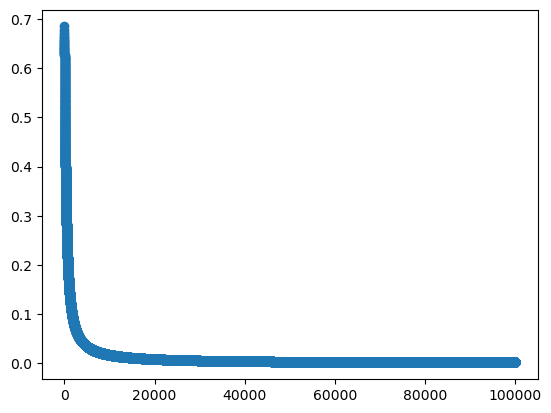

In [84]:
iter = 100000
alpha = 10e-2
w_i = np.zeros((n,))
b_i = 0
w, b, cost_list= gradient_descent(alpha, iter, X_train, y_train, w_i, b_i, compute_cost, compute_gradient)
print(f"PREDICTION\nValue of w is: {w}\nValue of b is: {b}")

plt.scatter([i for i in range(iter)],cost_list)
print(f"Cost: {cost_list[-1]}")
plt.show()